This is a notebook used to perfrom some exploratory data analysis on the processed dataset.

# Load dependencies

In [269]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random


# Load data

In [208]:
data = pd.read_csv("../data/coffee_review_processed_01.csv") # pd.read_csv("../data/coffee_test.csv")
df0 = pd.read_csv("../data/coffee_ultimato.csv")

In [209]:
# Check the difference in each row of the URL column
sum(data["URL"] == df0["URL"])

8387

In [210]:
# Compare columns in coffee_review_processed_01 and coffee_ultimato
set1 = set(data.columns)
set2 = set(df0.columns)
print("Deleted columns:", set1 - set2)
print("Added columns:", set2 - set1)

Deleted columns: {'all_text', 'Review Date', 'Agtron', 'Est. Price', 'Roast Level'}
Added columns: {'review_date_adj', 'coffee_origin_adj', 'roast_lv_adj', 'coffee_name_hundredpercent'}


In [ ]:
roast_levels = ["light", "medium-light", "medium", "medium-dark", "dark", "very dark"]
level_label_map = dict(zip(roast_levels, list(range(1, 7))))
label_level_map = dict(zip(list(range(1, 7)), roast_levels))

In [212]:
df0.columns

Index(['URL', 'Rating', 'Roaster', 'Coffee Name', 'Roaster Location',
       'Coffee Origin', 'Aroma', 'Acidity', 'Acidity/Structure', 'Body',
       'Flavor', 'Aftertaste', 'With Milk', 'Blind Assessment', 'Notes',
       'Who Should Drink It', 'Bottom Line', 'Agtron_whole', 'Agtron_ground',
       'Roaster Latitude', 'Roaster Longitude', 'usd_per_100g_adj',
       'coffee_origin_adj', 'roast_lv_adj', 'coffee_name_hundredpercent',
       'review_date_adj'],
      dtype='object')

# Data Preprocessing for clustering

## Check Agtron
Valid range: 0-100

In [213]:
df0[df0["Agtron_whole"] > 100] #.loc[2050, "URL"] # 2050: 54, 5780:52, 7748:55 , 8115: 57

,URL,Rating,Roaster,Coffee Name,Roaster Location,Coffee Origin,Aroma,Acidity,Acidity/Structure,Body,...,Bottom Line,Agtron_whole,Agtron_ground,Roaster Latitude,Roaster Longitude,usd_per_100g_adj,coffee_origin_adj,roast_lv_adj,coffee_name_hundredpercent,review_date_adj


In [ ]:
# agtron_whole_indices = [2050, 5780, 7748, 8115]
# df0.loc[2050, 'Agtron_whole'] = 54
# df0.loc[5780, 'Agtron_whole'] = 52
# df0.loc[7748, 'Agtron_whole'] = 55
# df0.loc[8115, 'Agtron_whole'] = 57

# df0[df0["Agtron_whole"] > 100] 

,URL,Rating,Roaster,Coffee Name,Roaster Location,Coffee Origin,Aroma,Acidity,Acidity/Structure,Body,...,Bottom Line,Agtron_whole,Agtron_ground,Roaster Latitude,Roaster Longitude,usd_per_100g_adj,coffee_origin_adj,roast_lv_adj,coffee_name_hundredpercent,review_date_adj


In [214]:
df0[df0["Agtron_ground"] > 100]
# df0[df0["Agtron_whole"] == 48]
# df0.loc[7309, 'Agtron_ground'] = 68

,URL,Rating,Roaster,Coffee Name,Roaster Location,Coffee Origin,Aroma,Acidity,Acidity/Structure,Body,...,Bottom Line,Agtron_whole,Agtron_ground,Roaster Latitude,Roaster Longitude,usd_per_100g_adj,coffee_origin_adj,roast_lv_adj,coffee_name_hundredpercent,review_date_adj
567,https://www.coffeereview.com/review/brazil-gau...,94.0000,SOT Coffee Roaster,Brazil Gauriroba Natural,"Osaka, Japan","Minas Gerais State, southeastern Brazil",9.0000,NaN,9.0000,9.0000,...,"An intriguingly complex Brazil natural cup, re...",82.0000,104.0000,34.6858,135.5150,NaN,brazil,1.0000,False,2021-07-01
997,https://www.coffeereview.com/review/colombia-c...,96.0000,SOT Coffee Roaster,Colombia Cauca El Paraiso,"Osaka, Japan","Cauca, Colombia",9.0000,NaN,9.0000,9.0000,...,An exquisitely refined ultra-light-roasted cof...,85.0000,105.0000,34.6858,135.5150,NaN,colombia,1.0000,False,2021-03-01
1417,https://www.coffeereview.com/review/colombia-w...,95.0000,Prodigal Coffee,Colombia Wilder Lasso Geisha Lot 2 Anaerobic W...,"Boulder, Colorado","Huila Department, Colombia",9.0000,NaN,9.0000,9.0000,...,"This complex, nuanced Colombia Geisha, a washe...",66.0000,103.0000,40.0258,-105.2433,26.6667,colombia,1.0000,False,2024-04-01
1651,https://www.coffeereview.com/review/costa-rica...,95.0000,Magnolia Coffee,Costa Rica Las Lajas Black Diamond Bourbon,"Charlotte, North Carolina","Sabanilla de Alajuela, Central Valley, Costa Rica",9.0000,NaN,9.0000,9.0000,...,"A juicy, fruit-forward, floral-toned Costa Ric...",72.0000,102.0000,35.1311,-80.7276,8.2306,costa rica,1.0000,False,2024-08-01
2914,https://www.coffeereview.com/review/ethiopia-i...,93.0000,Revel Coffee,Ethiopia Israel Degefa Wush Wush,"Billings, Montana","Sama, Ana Sora District, Oromia Region, Ethiopia",9.0000,NaN,9.0000,8.0000,...,"A balanced, sophisticated natural-processed Et...",75.0000,102.0000,45.7433,-108.5996,6.9078,ethiopia,1.0000,False,2024-02-01
4163,https://www.coffeereview.com/review/guatemala-...,93.0000,Bonlife Coffee,Guatemala Finca La Linea Gesha,"Cleveland, Tennessee","Huehuetenango Department, Guatemala",9.0000,NaN,8.0000,9.0000,...,"A dessert-in-the-cup style coffee; opulent, fr...",83.0000,118.0000,35.2060,-84.8475,8.8141,guatemala,1.0000,False,2024-10-01
6183,https://www.coffeereview.com/review/nicaragua-...,92.0000,Big Nose Cafe,Nicaragua Finca La Joya Villa Lobos Natural Sa...,"Hsinchu, Taiwan, China","Nueva Segovia Department, Diplito growing regi...",9.0000,8.0000,NaN,8.0000,...,NaN,72.0000,102.0000,24.8138,120.9675,12.1664,nicaragua,1.0000,False,2015-04-01
6903,https://www.coffeereview.com/review/perci-red-...,95.0000,Barrington Coffee Roasting Co.,Perci Red Panama Gesha,"Lee, Massachusetts","Silla Del Pando, Volcan, Panama.",9.0000,9.0000,NaN,9.0000,...,NaN,74.0000,101.0000,42.2841,-73.2573,28.2876,panama,1.0000,False,2014-12-01
7282,https://www.coffeereview.com/review/rwanda-mur...,92.0000,Intelligentsia Coffee,Rwanda Murundo People’s Farm,"Chicago, Illinois","Ghiombo, Nyamasheke District, Western Province...",9.0000,NaN,8.0000,8.0000,...,Complex citrus aromas and flavors are at the h...,76.0000,105.0000,41.8781,-87.6298,NaN,rwanda,1.0000,False,2025-02-01


In [ ]:
# df0.to_csv("../data/coffee_ultimato.csv", index=False)

In [215]:
# 04/13 task - Can we handle missing value in Agtron_whole/Agtron_ground if we have roast level info?
df0[(df0["Agtron_whole"].isnull()) & (~df0["roast_lv_adj"].isnull())]

,URL,Rating,Roaster,Coffee Name,Roaster Location,Coffee Origin,Aroma,Acidity,Acidity/Structure,Body,...,Bottom Line,Agtron_whole,Agtron_ground,Roaster Latitude,Roaster Longitude,usd_per_100g_adj,coffee_origin_adj,roast_lv_adj,coffee_name_hundredpercent,review_date_adj
17,https://www.coffeereview.com/review/100-colomb...,71.0000,Yuban Coffee Company,100% Colombian,"White Plains, New York",NaN,4.0000,5.0000,NaN,8.0000,...,NaN,NaN,64.0000,41.0332,-73.7650,NaN,others,2.0000,True,1997-05-01
230,https://www.coffeereview.com/review/augies-eth...,89.0000,Voila Coffee,Augie’s Ethiopia Layo Teraga Natural (Instant ...,"Bend, Oregon","Guji Zone, Oromia Region, southern Ethiopia",8.0000,NaN,8.0000,8.0000,...,"The juicy, lushly sweet-tart character of a fi...",NaN,NaN,44.0790,-121.3053,NaN,ethiopia,1.0000,False,2018-09-01
231,https://www.coffeereview.com/review/augies-eth...,88.0000,Voila Coffee,Augie’s Ethiopia Layo Teraga Washed (Instant C...,"Bend, Oregon","Guji Zone, Oromia Region, southern Ethiopia",8.0000,NaN,8.0000,7.0000,...,"Rewards patience, which should reveal, beneath...",NaN,NaN,44.0790,-121.3053,NaN,ethiopia,1.0000,False,2018-09-01
529,https://www.coffeereview.com/review/brazil-cup...,92.0000,Difference Coffee,Brazil Cup of Excellence Prize Winner,"London, England","Chapada Diamantina growing region, Bahia State...",8.0000,NaN,NaN,8.0000,...,"A sweet, delicately distinctive Brazil, cocoa-...",NaN,58.0000,51.5077,-0.0672,NaN,brazil,3.0000,False,2018-08-01
1241,https://www.coffeereview.com/review/colombia-l...,90.0000,Timothy's World Coffee,Colombia La Vereda,"Toronto, Canada",NaN,8.0000,8.0000,NaN,8.0000,...,NaN,NaN,NaN,43.6532,-79.3832,NaN,others,1.0000,False,2003-02-01
1464,https://www.coffeereview.com/review/colombian-...,87.0000,Millstone Coffees,Colombian Supremo,"Cincinnati, Ohio",Colombia.,7.0000,7.0000,NaN,7.0000,...,NaN,NaN,NaN,39.1031,-84.5120,NaN,colombia,1.0000,False,2003-01-01
2692,https://www.coffeereview.com/review/ethiopia-d...,86.0000,Reanimator Coffee Roasters,Ethiopia Duromina (Instant Coffee),"Philadelphia, Pennsylvania","Oromia Region, southern Ethiopia",7.0000,NaN,7.0000,7.0000,...,Quietly lively washed Ethiopia that preserves ...,NaN,NaN,39.9524,-75.2167,NaN,ethiopia,1.0000,False,2018-09-01
3646,https://www.coffeereview.com/review/fair-trade...,84.0000,Bucks County Coffee,Fair Trade Organic Sumatra,"Langhorne, Pennsylvania","Northwestern Sumatra, Indonesia",7.0000,6.0000,NaN,8.0000,...,NaN,NaN,54.0000,40.1919,-74.8686,NaN,indonesia,3.0000,False,2003-06-01
3784,https://www.coffeereview.com/review/folger-mou...,77.0000,Procter & Gamble,Folger Mountain Grown Coffee,"Cincinnati, Ohio",NaN,6.0000,5.0000,NaN,7.0000,...,NaN,NaN,60.0000,39.1031,-84.5120,NaN,others,3.0000,False,1997-05-01
3788,https://www.coffeereview.com/review/folgers-fr...,74.0000,Procter & Gamble,Folgers French Roast,"Cincinnati, Ohio",NaN,7.0000,5.0000,NaN,7.0000,...,NaN,NaN,55.0000,39.1031,-84.5120,NaN,others,3.0000,False,1997-05-01


## Check other numerical values
Aroma-Valid range: 1-10

Acidity; Acidity/Structure-Valid range: 1-10

Body-Valid range: 1-10

Flavor-Valid range: 1-10

Aftertaste-Valid range: 1-10

In [65]:
df0["Aftertaste"].value_counts()

Aftertaste
8.0     4791
9.0     1377
7.0     1079
6.0       88
5.0       30
10.0      26
4.0       13
3.0        6
2.0        3
Name: count, dtype: int64

# Training data

In [216]:
coffee_characteristics = ["Coffee Origin", "coffee_origin_adj", 
                          "roast_lv_adj", 
                          "Agtron_whole", "Agtron_ground",
                          "Aroma",
                          "Acidity",
                          "Acidity/Structure",
                          "Body",
                          "Flavor",
                          "Aftertaste",
                          "With Milk",
                          "Roaster Latitude", "Roaster Longitude",
                          "review_date_adj"]

targets = ["Rating", "usd_per_100g_adj"]
df = df0[["URL"] + coffee_characteristics + targets].copy()

In [58]:
# # Count missing values in each column
# missing_values = df.isnull().sum()

# # Calculate missing rate (missing values / total rows)
# missing_rate = round(missing_values * 100 / len(df), 2)

# print("Missing values per column:")
# print(missing_values)
# print("\nMissing rate per column:")
# print(missing_rate)

In [217]:
# Check Acidity and Acidity/Structure - Are they consistent?
print(len(df[(~df["Acidity"].isnull()) & (~df["Acidity/Structure"].isnull())]))

# Combine the 2 columns - Fill "Acidity" using "Acidity/Structure"
df['Acidity_combined'] = df.apply(
    lambda row: row['Acidity/Structure'] if pd.isna(row['Acidity']) else row['Acidity'],
    axis=1)

# Check NaN in the new Acidity column
sum(df["Acidity_combined"].isnull())

0


1409

In [218]:
df["coffee_origin_adj"].unique()

array([nan, 'peurto rico', 'colombia', 'others', 'ethiopia', 'guatemala',
       'hawaii', 'jamaica', 'mexico', 'peru', 'indonesia', 'tanzania',
       'costa rica', 'kenya', 'brazil', 'nicaragua', 'panama', 'thailand',
       'bolivia', 'philippines', 'taiwan', 'honduras', 'congo',
       'australia', 'yemen', 'china', 'salvador', 'rwanda', 'burundi',
       'united states', 'haiti', 'ecuador', 'dominican republic',
       'vietnam', 'india', 'uganda', 'zimbabwe', 'zambia'], dtype=object)

In [219]:
features = ["roast_lv_adj", 
            "Agtron_whole", "Agtron_ground",
            "Aroma",
            "Acidity_combined",
            "Body",
            "Flavor",
            "Aftertaste"] # "Roaster Latitude", "Roaster Longitude", "review_date_adj", "With Milk", "Coffee Origin", "coffee_origin_adj"
train_df = df[["URL"] + features].copy()

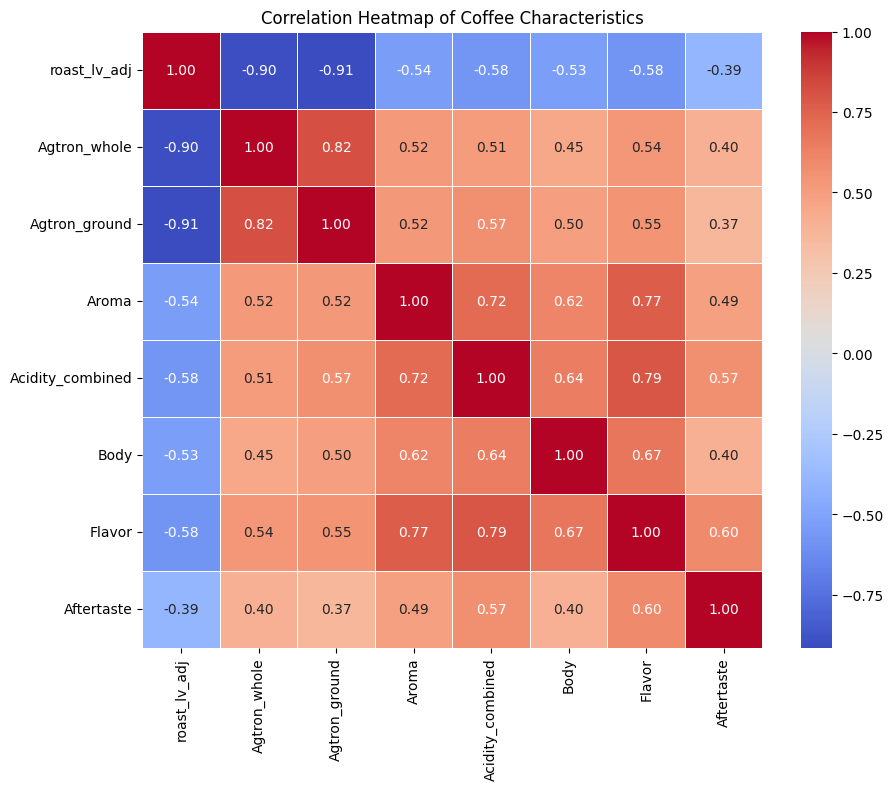

In [220]:
corr_matrix = train_df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Coffee Characteristics')
plt.show()

In [221]:
train_df.isnull().sum()

URL                    0
roast_lv_adj         506
Agtron_whole         415
Agtron_ground        406
Aroma                167
Acidity_combined    1409
Body                 116
Flavor               120
Aftertaste           974
dtype: int64

In [222]:
train_df

,URL,roast_lv_adj,Agtron_whole,Agtron_ground,Aroma,Acidity_combined,Body,Flavor,Aftertaste
0,https://www.coffeereview.com/review/100-arabic...,3.0000,48.0000,65.0000,8.0000,NaN,8.0000,8.0000,7.0000
1,https://www.coffeereview.com/review/100-arabic...,5.0000,0.0000,80.0000,7.0000,NaN,8.0000,7.0000,7.0000
2,https://www.coffeereview.com/review/100-arabic...,2.0000,54.0000,69.0000,8.0000,7.0000,7.0000,8.0000,7.0000
3,https://www.coffeereview.com/review/100-arabic...,NaN,0.0000,0.0000,7.0000,7.0000,8.0000,8.0000,8.0000
4,https://www.coffeereview.com/review/100-arabic...,NaN,0.0000,0.0000,4.0000,4.0000,7.0000,3.0000,4.0000
...,...,...,...,...,...,...,...,...,...
8382,https://www.coffeereview.com/review/zimbabwean...,3.0000,48.0000,67.0000,8.0000,7.0000,8.0000,8.0000,7.0000
8383,https://www.coffeereview.com/review/zimbabwe/,3.0000,50.0000,63.0000,5.0000,6.0000,8.0000,6.0000,7.0000
8384,https://www.coffeereview.com/review/zombie-des...,4.0000,47.0000,52.0000,8.0000,7.0000,8.0000,7.0000,7.0000
8385,https://www.coffeereview.com/review/zoom-espre...,3.0000,44.0000,60.0000,9.0000,NaN,8.0000,9.0000,8.0000


In [223]:
train_df_1 = train_df[~train_df["roast_lv_adj"].isnull()]

In [224]:
train_df_1.isnull().sum()

URL                    0
roast_lv_adj           0
Agtron_whole          30
Agtron_ground         21
Aroma                 21
Acidity_combined    1245
Body                  11
Flavor                13
Aftertaste           618
dtype: int64

In [225]:
train_df_1[train_df_1["Agtron_ground"]==0]

,URL,roast_lv_adj,Agtron_whole,Agtron_ground,Aroma,Acidity_combined,Body,Flavor,Aftertaste
1758,https://www.coffeereview.com/review/costa-rica...,6.0000,45.0000,0.0000,7.0000,7.0000,7.0000,7.0000,NaN
4698,https://www.coffeereview.com/review/india-dark...,6.0000,36.0000,0.0000,7.0000,NaN,8.0000,7.0000,NaN
4700,https://www.coffeereview.com/review/india-full...,6.0000,45.0000,0.0000,8.0000,6.0000,8.0000,8.0000,NaN
4705,https://www.coffeereview.com/review/india-mneb/,6.0000,43.0000,0.0000,7.0000,6.0000,7.0000,8.0000,NaN
4716,https://www.coffeereview.com/review/india-s795/,6.0000,44.0000,0.0000,7.0000,6.0000,8.0000,7.0000,NaN
5987,https://www.coffeereview.com/review/mjb-100-co...,6.0000,61.0000,0.0000,7.0000,7.0000,8.0000,7.0000,NaN
6078,https://www.coffeereview.com/review/mountain-c...,6.0000,53.0000,0.0000,7.0000,6.0000,7.0000,7.0000,NaN
6079,https://www.coffeereview.com/review/mountain-c...,6.0000,48.0000,0.0000,7.0000,7.0000,8.0000,7.0000,NaN
6311,https://www.coffeereview.com/review/old-city-b...,6.0000,60.0000,0.0000,8.0000,6.0000,7.0000,7.0000,NaN


In [80]:
train_df_1.to_csv("../data/clustering_train.csv", index=False)

In [34]:
# plt.figure(figsize=(10, 6))
# train_df["Body"].plot(kind="hist") # sns.histplot(train_df['Body'], kde=False, bins=10, color='blue')  # Use KDE=False to avoid a density curve
# plt.title('Distribution of Coffee Body')
# plt.xlabel('Body')
# plt.ylabel('Frequency')
# plt.show()

In [226]:
train_data0 = train_df_1.dropna()

In [227]:
len(train_data0)

6104

In [228]:
invalid_agtrons = train_data0[(train_data0["Agtron_whole"] == 0) & (train_data0["roast_lv_adj"] != 6)].index
print(len(invalid_agtrons))

5


In [229]:
# What if we drop where agtron_whole == 0 where roast_lv_adj !=6?
train_data1 = train_data0.drop(invalid_agtrons)
# train_data2 = train_data1[~(train_data1["Agtron_whole"] == 0)]

print(len(train_data1))

6099


In [230]:
train_data1.to_csv("../data/clustering_train_with_url.csv", index=False)

In [254]:
# Prepare training data
train_data = train_data1[features].copy()
print(train_data.isnull().sum())
print(len(train_data))

# Load dependencies and normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data)

# Initialize dataframe to store labels
label_df = pd.DataFrame()

roast_lv_adj        0
Agtron_whole        0
Agtron_ground       0
Aroma               0
Acidity_combined    0
Body                0
Flavor              0
Aftertaste          0
dtype: int64
6099


In [ ]:
# train_data.to_csv("../data/clustering_train.csv", index=False)

# Hierarchical Clustering
Can we use this to decide #clusters?

In [255]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

In [242]:
def show_dendrogram(linkage_matrix, linkage_rule, customize_colors=False, cut_height=None):
    plt.figure(figsize=(15, 6))
    
    # Plot the dendrogram and color different clusters if needed
    if customize_colors:
        if cut_height is None:
            assert ValueError("Please provide the cut height if you need to color the clusters by labels.")

        dendrogram(linkage_matrix, color_threshold=cut_height, above_threshold_color="grey")
    else:
        dendrogram(linkage_matrix, color_threshold=0)
    
     # Show cut height in the dendrogram
    if cut_height is not None:
        plt.axhline(y=cut_height, color='g', linestyle='--')
        print("Cut height:", cut_height)

    plt.title(f'Hierarchical Clustering Dendrogram using the {linkage_rule} linkage rule')
    plt.xlabel('Index')
    plt.xticks(rotation=90)
    plt.ylabel('Distance')
    plt.show()

def get_merge_height(linkage_matrix, branch_index):
    # Retrieve the height of the specified branching point
    branch_height = linkage_matrix[branch_index, 2]
    return branch_height

def show_cut_height(linkage_matrix, linkage_rule, branch_index):
    cut_height = get_merge_height(linkage_matrix, branch_index)
    show_dendrogram(linkage_matrix, linkage_rule, cut_height=cut_height)

import math
import random # Used to select the cut height in the interval

def get_intervals(linkage_matrix):
    """Get the largest 10 cut heights and get the intervals - A large interval can result in a resonable 'K'"""
    cut_heights = []

    for i in range(10):
        cut_heights.append(round(get_merge_height(linkage_matrix, branch_index=np.argmax(linkage_matrix[:, 2]) - i), 4))

    cut_intervals = []
    interval_lengths = []
    for i in range(1, 10):
        cut_intervals.append((cut_heights[i], cut_heights[i - 1]))
        interval_lengths.append(cut_heights[i - 1] - cut_heights[i])

 
    num_of_clusters = []
    selected_heights = []
    for i in range(len(cut_intervals)):

        # Fix the random seed for reproducibility 
        random.seed(42)

        # Set the cut height
        lower_bound, upper_bound = cut_intervals[i]
        lower_bound = math.ceil(lower_bound)
        upper_bound = math.floor(upper_bound)
        cut_height = random.uniform(lower_bound, upper_bound)
        selected_heights.append(cut_height)

        # Calculate the number of clusters
        current_labels = fcluster(linkage_matrix, t=cut_height, criterion='distance')
        current_k = len(set(current_labels))
        num_of_clusters.append(current_k)

    df = pd.DataFrame({'cut height interval': cut_intervals, 'selected cut height': selected_heights, 'number of clusters': num_of_clusters, 'interval length': interval_lengths})
    df = df.sort_values(by='interval length', ascending=False)
    return df

In [248]:
complete_linkage_matrix = linkage(scaled_data, method='complete')
average_linkage_matrix = linkage(scaled_data, method='average')
single_linkage_matrix = linkage(scaled_data, method='single')
ward_linkage_matrix = linkage(scaled_data, method='ward')

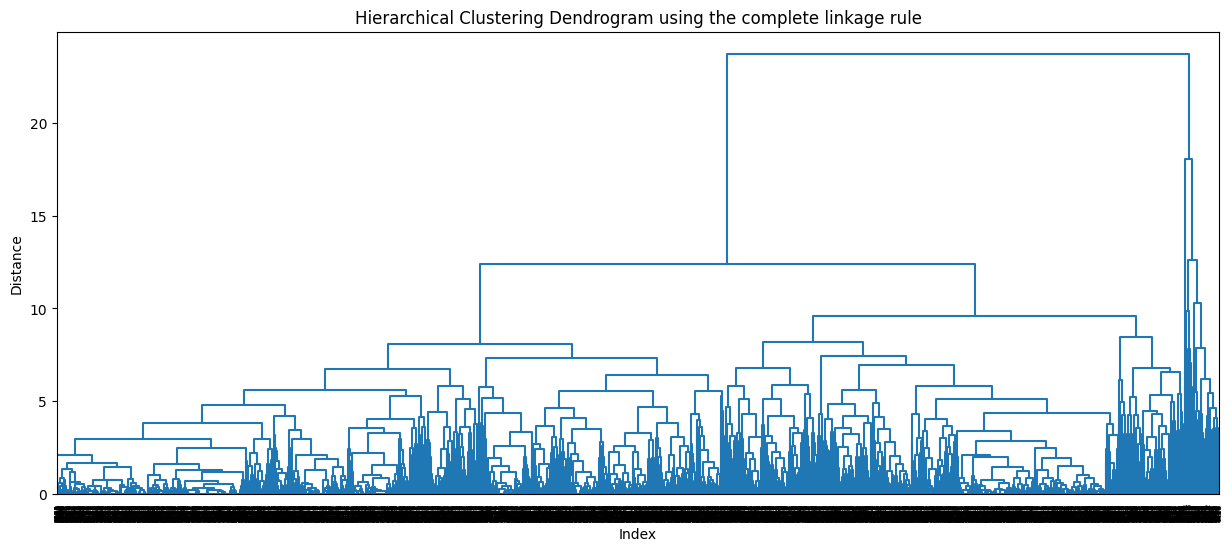

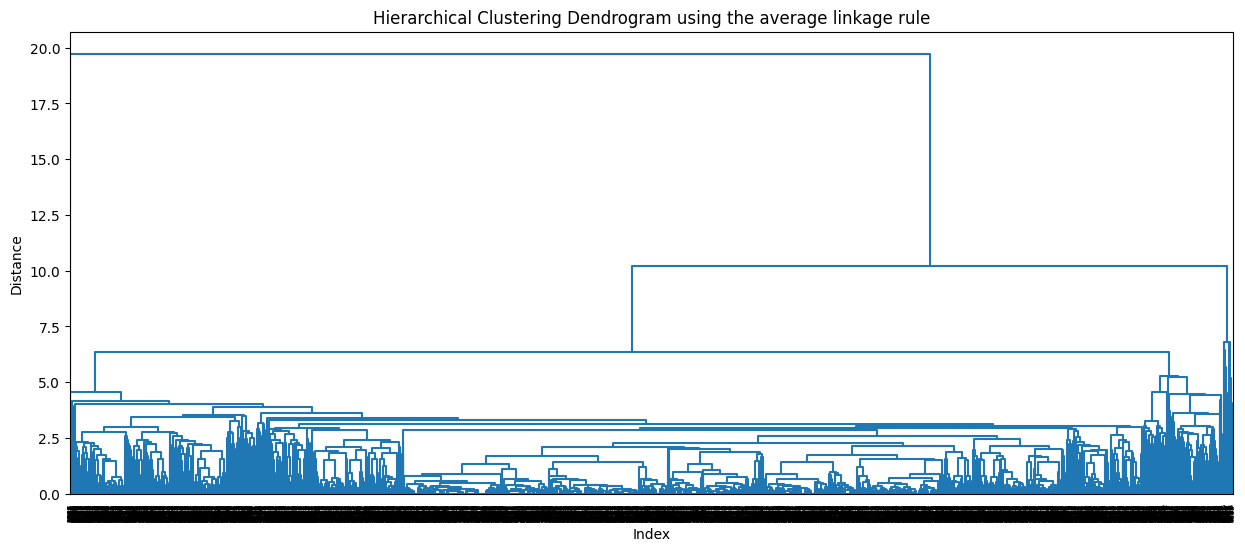

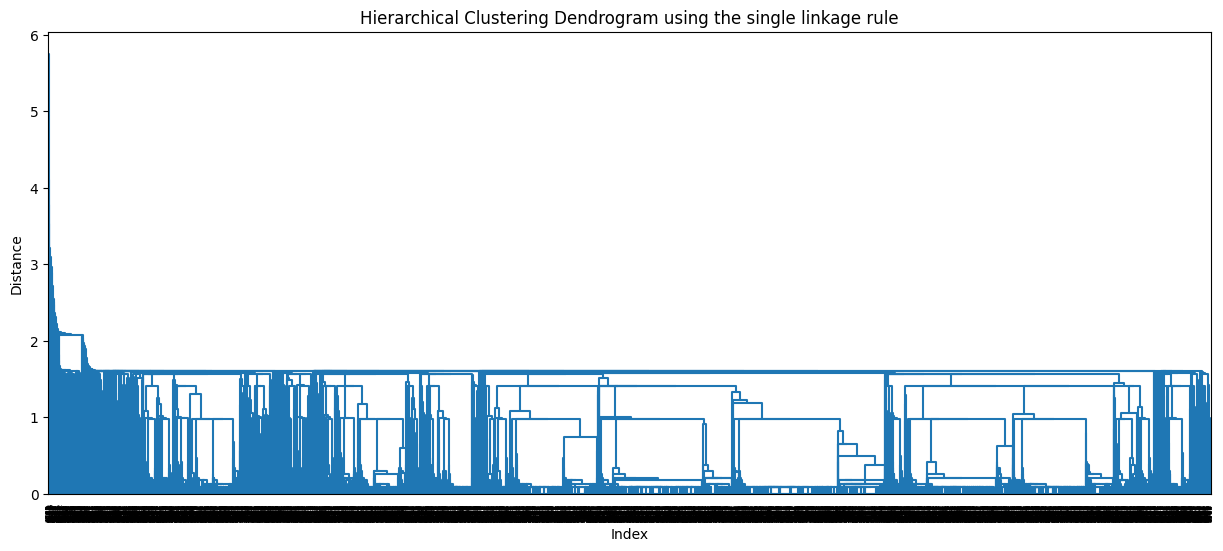

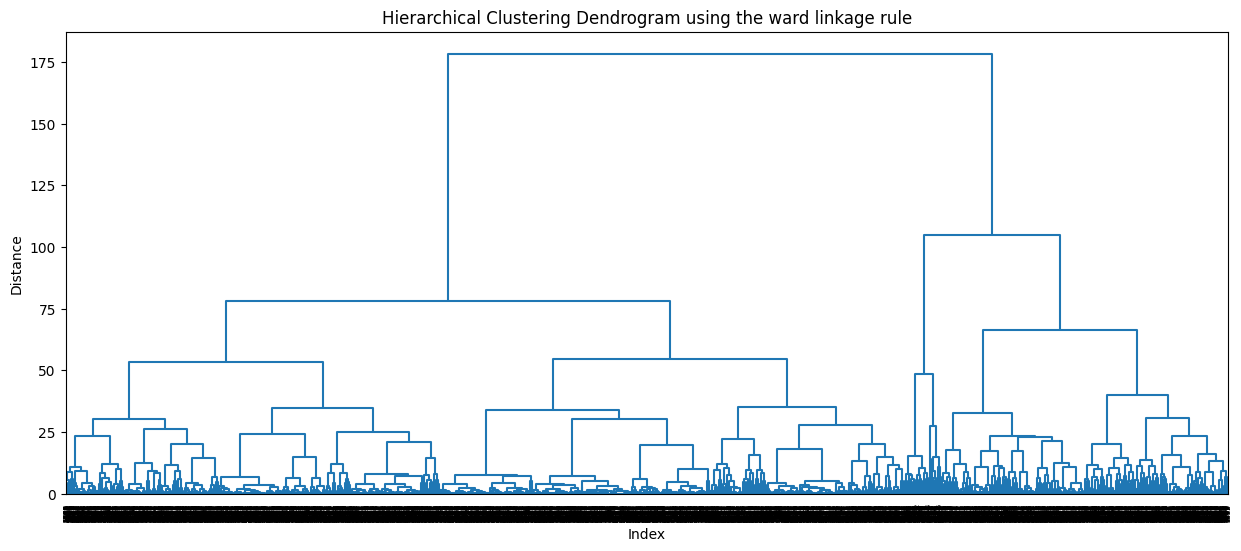

In [249]:
show_dendrogram(complete_linkage_matrix, linkage_rule='complete') 
show_dendrogram(average_linkage_matrix, linkage_rule='average')
show_dendrogram(single_linkage_matrix, linkage_rule='single')
show_dendrogram(ward_linkage_matrix, linkage_rule='ward')

In [244]:
get_intervals(complete_linkage_matrix)

,cut height interval,selected cut height,number of clusters,interval length
0,"(18.0789, 23.7481)",21.5577,2,5.6692
1,"(12.6004, 18.0789)",16.1971,3,5.4785
3,"(10.3031, 12.4178)",11.6394,5,2.1147
6,"(8.4645, 9.6084)",9.0000,8,1.1439
4,"(9.878, 10.3031)",10.0000,6,0.4251
7,"(8.1638, 8.4645)",8.3606,9,0.3007
5,"(9.6084, 9.878)",9.3606,8,0.2696
2,"(12.4178, 12.6004)",12.3606,5,0.1826
8,"(8.0644, 8.1638)",8.3606,9,0.0994


In [245]:
get_intervals(average_linkage_matrix)

,cut height interval,selected cut height,number of clusters,interval length
0,"(10.2211, 19.7323)",16.1154,2,9.5112
1,"(6.7908, 10.2211)",8.9183,3,3.4303
6,"(5.6666, 6.0509)",6.0000,8,0.3843
7,"(5.2905, 5.6666)",5.3606,9,0.3761
3,"(6.4258, 6.7783)",6.3606,7,0.3525
5,"(6.0509, 6.3636)",6.3606,7,0.3127
4,"(6.3636, 6.4258)",6.3606,7,0.0622
8,"(5.2578, 5.2905)",5.3606,9,0.0327
2,"(6.7783, 6.7908)",6.3606,7,0.0125


In [250]:
get_intervals(single_linkage_matrix)

,cut height interval,selected cut height,number of clusters,interval length
1,"(4.1067, 4.9413)",4.3606,3,0.8346
0,"(4.9413, 5.7537)",5.0000,2,0.8124
2,"(3.77, 4.1067)",4.0000,4,0.3367
4,"(3.2081, 3.5216)",3.3606,6,0.3135
3,"(3.5216, 3.77)",3.3606,6,0.2484
8,"(2.9698, 3.0779)",3.0000,10,0.1081
6,"(3.0916, 3.1601)",3.3606,6,0.0685
5,"(3.1601, 3.2081)",3.3606,6,0.0480
7,"(3.0779, 3.0916)",3.3606,6,0.0137


In [251]:
get_intervals(ward_linkage_matrix)

,cut height interval,selected cut height,number of clusters,interval length
0,"(104.9469, 178.295)",151.6782,2,73.3481
1,"(78.0582, 104.9469)",94.9857,3,26.8887
2,"(66.2369, 78.0582)",74.0337,4,11.8213
3,"(54.589, 66.2369)",62.0337,5,11.6479
6,"(39.9271, 48.6836)",45.1154,8,8.7565
7,"(34.984, 39.9271)",37.5577,9,4.9431
5,"(48.6836, 53.5559)",51.5577,7,4.8723
4,"(53.5559, 54.589)",54.0000,6,1.0331
8,"(34.6967, 34.984)",34.3606,11,0.2873


Top 4 #clusters suggested:

- Complete rule: n_clusters = 2, 3, 5, 8
- Average rule: n_clusters = 2, 3, 8, 9
- Single rule: n_clusters = 3, 2, 4, 6
- Ward.D rule: n_clusters = 2, 3, 4, 5


Cut height: 151


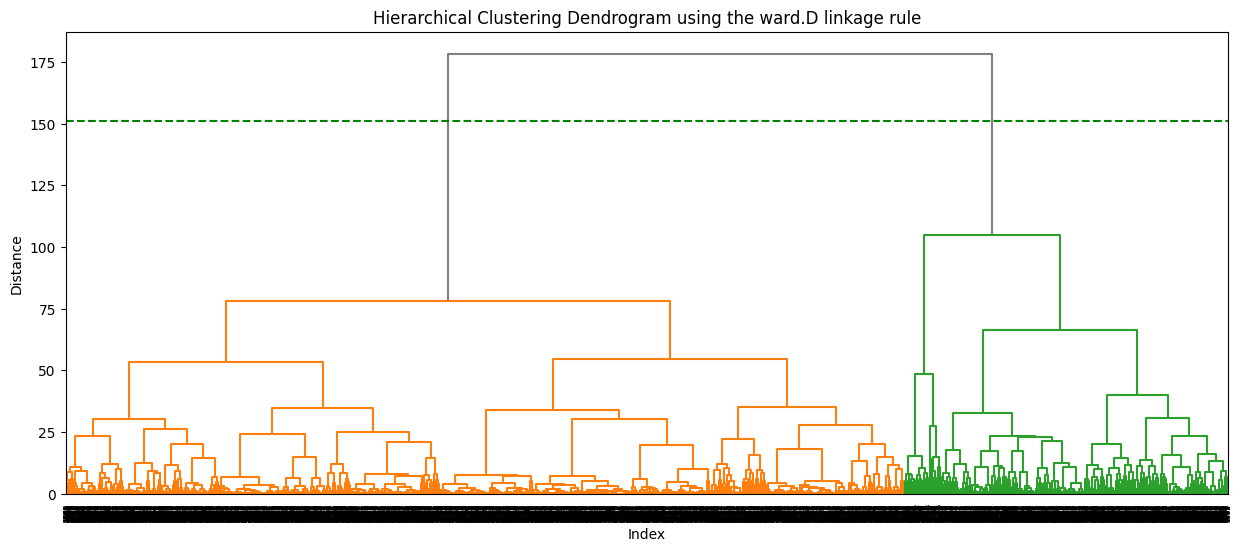

In [654]:
show_dendrogram(ward_linkage_matrix, 'ward.D', customize_colors=True, cut_height=151)

In [ ]:
# Get labels
n_clusters = [2, 3, 4, 5, 8]
for n in n_clusters:
    agg_cluster = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels = agg_cluster.fit_predict(scaled_data)
    label_df[f"hierarchical_ward_{n}"] = labels

# Dimensionality Reduction

In [128]:
def show_points_in_clusters(df):
  """2D Scatter plot with labels"""
  plt.figure(figsize=(6, 4))
  scatter_plot = plt.scatter(df['score1'], df['score2'], c=df['label'], cmap='rainbow', marker='o')
  unique_labels = df['label'].unique()
  # # Add centroids
  # centroids = model.cluster_centers_
  # plt.scatter(centroids[:, 0], centroids[:, 1], s=100, linewidths=0.5, c='orange', marker='X', label='Centroids')

  # Create a custom legend
  legend_colors = scatter_plot.cmap(scatter_plot.norm(unique_labels))
  legend_labels = [f"Cluster {int(label)}" for label in unique_labels]
  patches = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8)
              for color in legend_colors]
  plt.legend(patches, legend_labels, title="Clusters", loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

  plt.xlabel('score1')
  plt.ylabel('score2')
  plt.title('Scatter Plot with cluster labels')

  # if len(centroids) > 1:
  #   cbar = plt.colorbar(scatter_plot, label='Cluster Label')
  #   cbar.set_ticks(np.arange(len(np.unique(df['cluster_label']))))  # Set ticks to integers
  #   cbar.ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Ensure ticks are integers
  plt.show()

## PCA - How to decide number of components for PCA?

In [ ]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA()
pca.fit(scaled_data)

PCA()

### Method 1 - Cumulative Explained Variance - n_components: 5

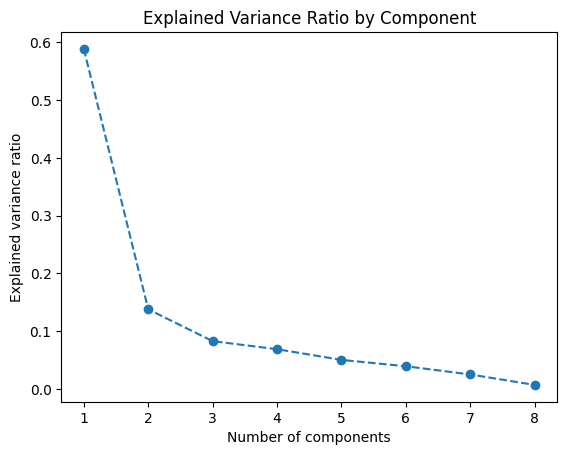

[0.58832738 0.72617848 0.80900668 0.87788727 0.92826745 0.96769042
 0.99287926 1.        ]
Selected number of components: 5


In [154]:
# Plot the explained variance ratio for each component
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance Ratio by Component')
plt.show()

# Cumulative variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print(cumulative_variance)
# Select the number of components that explain at least 90% variance
n_components = (cumulative_variance >= 0.90).argmax() + 1
print(f'Selected number of components: {n_components}')

### Method 2 - Kaiser Criterion - n_components = 2

In [155]:
# Select components with eigenvalues greater than 1
n_components_kaiser = sum(pca.explained_variance_ > 1)
print(f'Selected number of components according to Kaiser criterion: {n_components_kaiser}')

Selected number of components according to Kaiser criterion: 2


### Method 3 - Scree Plot - n_components = 2

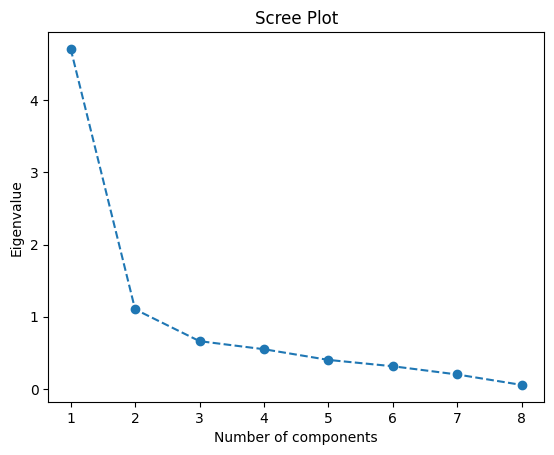

In [156]:
# Plot the scree plot
plt.plot(range(1, len(pca.explained_variance_) + 1), 
         pca.explained_variance_, marker='o', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

### Method 4 - KMeans performance (Silhouette Score)

In [167]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [259]:
n_components_range = range(2, 9)
best_score = -float('inf')
silhouette_scores = []

# Iterate over different numbers of PCA components
for n_components in n_components_range:
    # Apply PCA with 'n_components'
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(scaled_data)
    
    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3)  # Assuming 3 clusters, adjust if needed
    labels = kmeans.fit_predict(reduced_data)
    
    # Calculate silhouette score
    score = silhouette_score(reduced_data, labels)
    silhouette_scores.append(score)

# Find the best n_components based on silhouette score
best_n_components = n_components_range[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

print(f"Best n_components: {best_n_components} with silhouette score: {best_score}")

Best n_components: 2 with silhouette score: 0.4464977044862071


### Perform PCA using the best n_components

In [434]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [0.58832738 0.1378511 ]


In [435]:
pca_df= pd.DataFrame(data = reduced_data, columns = ['score1', 'score2'])

In [436]:
# PCA loadings (components_)
loadings = pca.components_

# Create a DataFrame for easy interpretation
loadings_df = pd.DataFrame(loadings, columns=train_data.columns, index=[f'PC{i+1}' for i in range(loadings.shape[0])])

# Optionally: Display the explained variance ratio for each component
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.58832738 0.1378511 ]


C:\Users\xin\AppData\Local\Temp\ipykernel_15568\1924666812.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df.index, y=loadings_df["PC1"], palette="dark:blue_r")


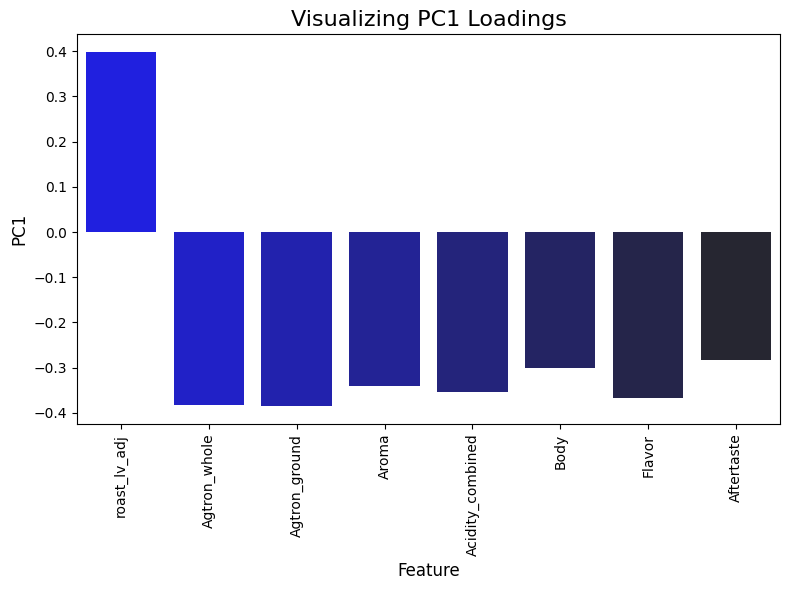

In [437]:
loadings_df = pd.DataFrame(pca.components_[0], columns=["PC1"], index=train_data.columns)

# Plotting the loadings for PC1
plt.figure(figsize=(8, 6))
sns.barplot(x=loadings_df.index, y=loadings_df["PC1"], palette="dark:blue_r")
plt.xticks(rotation=90)  # Rotate feature labels for readability
plt.title("Visualizing PC1 Loadings", fontsize=16)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("PC1", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\xin\AppData\Local\Temp\ipykernel_15568\1273182207.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df.index, y=loadings_df["PC2"], palette="dark:blue_r")


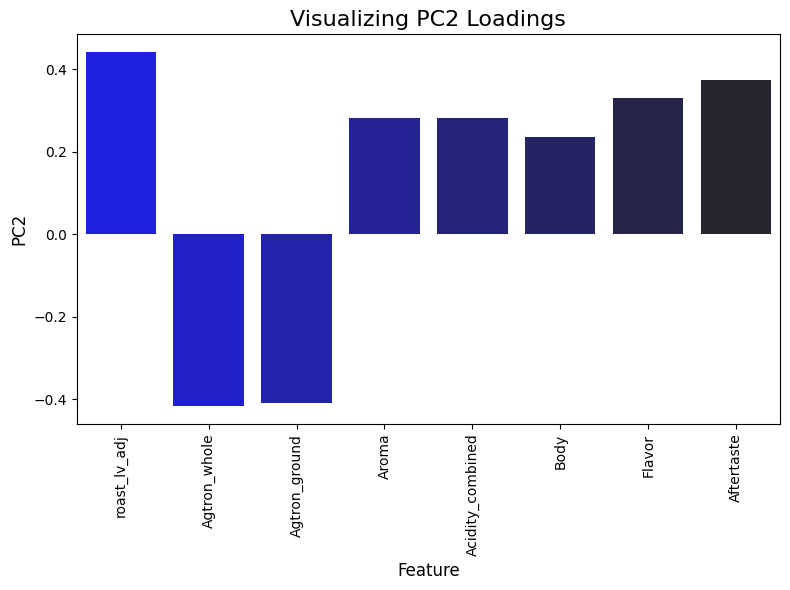

In [183]:
loadings_df = pd.DataFrame(pca.components_[1], columns=["PC2"], index=train_data.columns)

# Plotting the loadings for PC1
plt.figure(figsize=(8, 6))
sns.barplot(x=loadings_df.index, y=loadings_df["PC2"], palette="dark:blue_r")
plt.xticks(rotation=90)  # Rotate feature labels for readability
plt.title("Visualizing PC2 Loadings", fontsize=16)
plt.xlabel("Feature", fontsize=12)
plt.ylabel("PC2", fontsize=12)
plt.tight_layout()
plt.show()

## KPCA - How to decide n_components for kernel PCA?

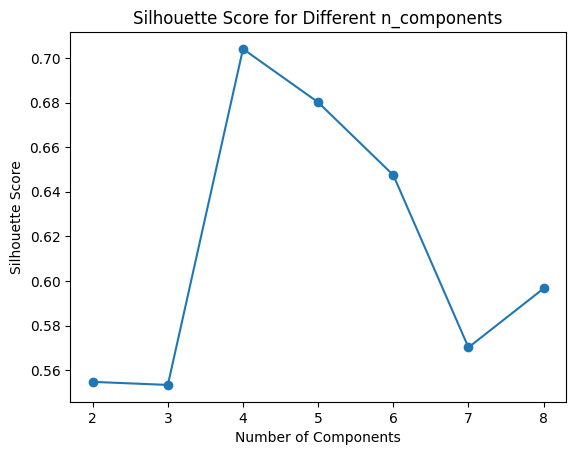

Best n_components: 4 with silhouette score: 0.704034510534361


In [262]:
# Initialize the range of n_components to test
n_components_range = range(2, 9)
silhouette_scores = []

# Iterate through different n_components values
for n_components in n_components_range:
    # Apply Kernel PCA with RBF kernel
    kpca = KernelPCA(n_components=n_components, kernel='rbf', gamma=1)
    transformed_data = kpca.fit_transform(scaled_data)
    
    # Apply KMeans clustering to the transformed data
    kmeans = KMeans(n_clusters=4) 
    kmeans.fit(transformed_data)
    
    # Calculate the silhouette score for the clustering
    score = silhouette_score(transformed_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores to visualize the best n_components
plt.plot(n_components_range, silhouette_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different n_components')
plt.show()

# Find the optimal n_components based on the highest silhouette score
optimal_n_components = n_components_range[np.argmax(silhouette_scores)]
print(f'Best n_components: {optimal_n_components} with silhouette score: {max(silhouette_scores)}')

### Find best Gamma for n_components = 2

In [ ]:
# Define the range of gamma values to search
gamma_values = range(100, 250, 25)
#0.001, 0.01, 0.1, 1, 10, 100, 200, 300150, 200, 250
# Store the results
results = []

random.seed(42)

for gamma in gamma_values:
    # Apply Kernel PCA with the RBF kernel and current gamma
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma)
    transformed_data = kpca.fit_transform(scaled_data)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(transformed_data)

    # Calculate silhouette score for the clustering
    score = silhouette_score(transformed_data, kmeans.labels_)
    results.append((gamma, score))

# Find the best gamma based on silhouette score
best_gamma = max(results, key=lambda x: x[1])
print(f'Best gamma: {best_gamma[0]} with silhouette score: {best_gamma[1]}')

Best gamma: 225 with silhouette score: 0.9933300944362479


In [278]:
results

[(100, 0.9786026047519272),
 (125, 0.9846583054482193),
 (150, 0.9869123558531295),
 (175, 0.9898259096597584),
 (200, 0.9919102270064969),
 (225, 0.9933300944362479)]

### KPCA using best n_components and best gamma

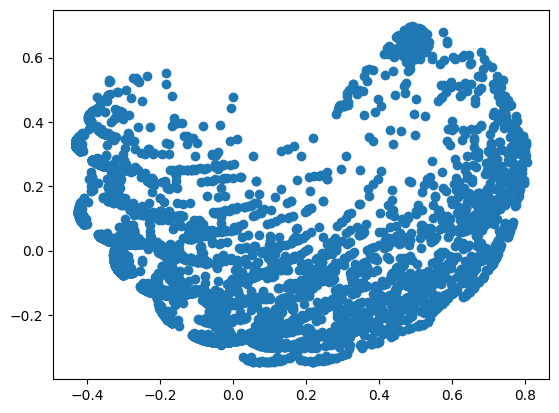

In [608]:
random.seed(42)
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.05)
kpca_transformed_data = kpca.fit_transform(scaled_data)
kpca_df= pd.DataFrame(data = kpca_transformed_data, columns = ['score1', 'score2'])

plt.scatter(kpca_df['score1'], kpca_df['score2'], marker='o')
plt.show()

# K-Means

In [609]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, davies_bouldin_score, calinski_harabasz_score
which_data = kpca_df[['score1', 'score2']] #kpca_df[['score1', 'score2']]# train_data #  # scaled_data  # 

## Decision on #clusters

In [440]:
def get_wcss_and_bcss(df, model):
    """
    Calculate WCSS (Total Within-Cluster Sum of Squares) and BCSS (Total Between-Cluster Sum of Squares)
    Formula: Total Sum of Squares (TSS) = WCSS + BCSS
    """
    wcss = model.inertia_
    tss = np.sum(np.sum((df - df.mean()) ** 2))
    bcss = tss - wcss

    return wcss, bcss

def calculate_wcss(df, model):
    data_points = df.values
    centroids = model.cluster_centers_
    labels = model.predict(df)

    wcss = 0
    for i in range(len(centroids)):
        points_in_cluster = data_points[labels == i]
        distances = np.linalg.norm(points_in_cluster - centroids[i], axis=1)
        wcss += np.sum(distances ** 2)
    return wcss

In [321]:
def calculate_silhouette(df, model, n_clusters):
    # Get labels based on the model
    labels = model.predict(df)

    ## Compute silhouette width for each point
    silhouette_widths = silhouette_samples(df, labels)

    ## Compute the overall average silhouette width
    overall_avg_sil_width = silhouette_score(df, labels)

    sil_per_cluster = []

    for i in range(n_clusters-1, -1, -1):
        sil_widths_in_cluster = silhouette_widths[labels == i]
        sil_per_cluster.append(np.mean(sil_widths_in_cluster))

    # Compute the minimum per-cluster average silhouette width
    min_per_cluster_avg_silhouette = min(sil_per_cluster)

    return overall_avg_sil_width, min_per_cluster_avg_silhouette

# Compute CH index
def calculate_ch_index(df, model):
    labels = model.predict(df)
    ch_index = calinski_harabasz_score(df, labels)
    return ch_index

In [357]:
def show_kmeans_results(df, scaled_data=scaled_data, n_clusters=3):
    """Show KMeans results using transformed data"""
    model = KMeans(n_clusters=n_clusters, n_init=100, random_state=42)


    # Use dimension reducted data--------
    data = df[['score1', 'score2']]
    # -----------------------------------

    # # Use original data ---------------
    # data = scaled_data
    # # ---------------------------------

    model.fit(data)
    new_labels = model.predict(data)

    sil_score = silhouette_score(data, new_labels) # The higher the better
    db_score = davies_bouldin_score(data, new_labels) # The lower the better

    print(f"Silhouette Score: {sil_score:.4f}, Davies-Bouldin Index: {db_score:.4f}")
    df['label'] = new_labels
    show_points_in_clusters(df)

In [441]:
all_wcss = []
all_bcss = []
all_models = []
lower_cluster_bound = 2
upper_cluster_bound = 15
gap = 1

for i in range(lower_cluster_bound, upper_cluster_bound, gap):

    # Train and save the KMeans model
    model = KMeans(n_clusters=i, n_init=100, random_state=42) # MiniBatchKMeans(n_clusters=i, random_state=42, batch_size=1000)
    model.fit(which_data)
    all_models.append(model)

    # Calculate the WCSS and BCSS
    wcss, bcss = get_wcss_and_bcss(which_data, model)
    all_wcss.append(wcss)
    all_bcss.append(bcss)

c:\Users\xin\anaconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\xin\anaconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\xin\anaconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction

In [442]:
WCSS_BCSS = pd.DataFrame({'Number of clusters': list(range(lower_cluster_bound, upper_cluster_bound, gap)), 'WCSS': all_wcss, 'BCSS': all_bcss})
pd.set_option('display.float_format', '{:.4f}'.format)
WCSS_BCSS

,Number of clusters,WCSS,BCSS
0,2,17157.8472,18273.8530
1,3,12292.0550,23139.6452
2,4,9943.5194,25488.1809
3,5,8224.0820,27207.6183
4,6,7016.2099,28415.4904
5,7,5921.4337,29510.2666
6,8,5011.8890,30419.8113
7,9,4407.3636,31024.3367
8,10,3957.7780,31473.9223
9,11,3557.7534,31873.9469


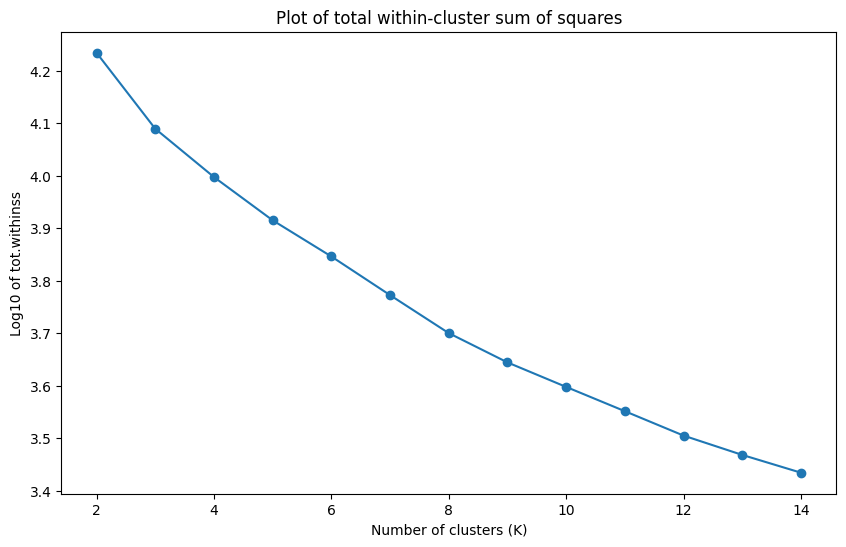

In [443]:
from matplotlib import ticker

# Plot the metrics on a log10 scale
plt.figure(figsize=(10, 6))

# Total within-cluster sum of squares (WCSS)
plt.plot(np.arange(lower_cluster_bound, upper_cluster_bound, gap), np.log10(all_wcss), marker='o', label='tot.withinss')

# Label the axes
plt.xlabel('Number of clusters (K)')
plt.ylabel('Log10 of tot.withinss')

# Make the values on x-axis all integers
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Add a title
plt.title('Plot of total within-cluster sum of squares')

# Show the plot
plt.show()

In [444]:
all_avg_sil = []
all_min_cluster_avg_widths = []
all_ch_index = []
which_model = 0
for i in range(lower_cluster_bound, upper_cluster_bound, gap):
    avg_silhouette, min_per_cluster_avg_silhouette = calculate_silhouette(which_data, all_models[which_model], n_clusters=i)
    all_avg_sil.append(avg_silhouette)
    all_min_cluster_avg_widths.append(min_per_cluster_avg_silhouette)

    ch_index = calculate_ch_index(which_data, all_models[which_model])
    all_ch_index.append(ch_index)

    which_model += 1

In [445]:
metrics = pd.DataFrame({'number of clusters': list(range(lower_cluster_bound, upper_cluster_bound, gap)), 'total within-cluster sum of squares': all_wcss,  'overall average silhouette width': all_avg_sil, 'smallest per-cluster average silhouette width': all_min_cluster_avg_widths, 'CH index': all_ch_index})
metrics

,number of clusters,total within-cluster sum of squares,overall average silhouette width,smallest per-cluster average silhouette width,CH index
0,2,17157.8472,0.5693,0.3396,6493.5700
1,3,12292.0550,0.4460,0.2903,5737.8510
2,4,9943.5194,0.3464,0.2757,5207.7625
3,5,8224.0820,0.3873,0.3184,5040.1743
4,6,7016.2099,0.3961,0.3169,4935.3324
5,7,5921.4337,0.4017,0.2789,5060.0512
6,8,5011.8890,0.4122,0.2770,5281.3583
7,9,4407.3636,0.4169,0.2906,5358.5950
8,10,3957.7780,0.4275,0.2658,5380.2765
9,11,3557.7534,0.4397,0.2435,5454.2450


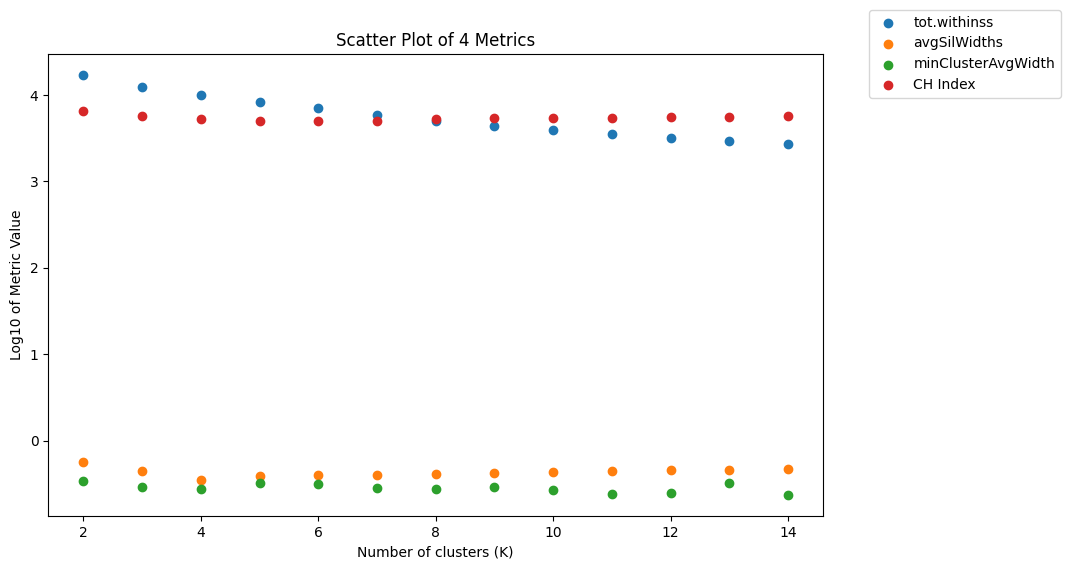

In [446]:
# Plot the metrics on a log10 scale
plt.figure(figsize=(10, 6))

# Total within-cluster sum of squares (WCSS)
plt.scatter(np.arange(lower_cluster_bound, upper_cluster_bound, gap), np.log10(metrics['total within-cluster sum of squares']), marker='o', label='tot.withinss')

# Overall average silhouette width
plt.scatter(np.arange(lower_cluster_bound, upper_cluster_bound, gap), np.log10(metrics['overall average silhouette width']), marker='o', label='avgSilWidths')

# Smallest per-cluster average silhouette width
plt.scatter(np.arange(lower_cluster_bound, upper_cluster_bound, gap), np.log10(metrics['smallest per-cluster average silhouette width']), marker='o', label='minClusterAvgWidth')

# Calinski-Harabasz (CH) index
plt.scatter(np.arange(lower_cluster_bound, upper_cluster_bound, gap), np.log10(metrics['CH index']), marker='o', label='CH Index')

# Label the axes
plt.xlabel('Number of clusters (K)')
plt.ylabel('Log10 of Metric Value')

# Make the values on x-axis all integers
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Add a legend
plt.legend(loc='center left', bbox_to_anchor=(1.05, 1))

# Add a title
plt.title('Scatter Plot of 4 Metrics')

# Show the plot
plt.show()

6104 rows: How do we select number of clusters on train_data:
1. Based on Elbow method: 5
2. Based on smallest gap between the average silhouette width and the minimum per-cluster average width: 4 (The gap at K=4 is the second smallest.)
3. Based on largest CH index: 5 (The CH Index at K=4 is the third largest.)
4. Based on largest average silhouette width: 2 (The average silhouette width at K=4 is the third largest.)

In conclusion, I chose 5 as the number of clusters.

6099 rows: How do we select number of clusters on PCA data:
1. Based on Elbow method: ?
2. Based on smallest gap between the average silhouette width and the minimum per-cluster average width: 5,4,6
3. Based on largest CH index: 2
4. Based on largest average silhouette width: 2

In conclusion, I chose 5 as the number of clusters.


6099 rows: How do we select number of clusters on KPCA data (n_components=2, gamma=200):
1. Based on Elbow method: 4
2. Based on smallest gap between the average silhouette width and the minimum per-cluster average width: 2,3,4
3. Based on largest CH index: ? 
4. Based on largest average silhouette width: 3

In conclusion, I chose 4 as the number of clusters.

6099 rows: How do we select number of clusters on KPCA data (n_components=2, gamma=100):
1. Based on Elbow method: ?
2. Based on smallest gap between the average silhouette width and the minimum per-cluster average width: 3, 4
3. Based on largest CH index: ? 
4. Based on largest average silhouette width: 3 

In conclusion, I chose 3 as the number of clusters.

6099 rows: How do we select number of clusters on KPCA data (n_components=2, gamma=10):
1. Based on Elbow method: 3
2. Based on smallest gap between the average silhouette width and the minimum per-cluster average width: 2,3
3. Based on largest CH index: ? 
4. Based on largest average silhouette width: 3,4,5

In conclusion, I chose 3 as the number of clusters.

6099 rows: How do we select number of clusters on KPCA data (n_components=2, gamma=1):
1. Based on Elbow method: 3
2. Based on smallest gap between the average silhouette width and the minimum per-cluster average width: 2,3
3. Based on largest CH index: ? 
4. Based on largest average silhouette width: 3,4,2

In conclusion, I chose 3 as the number of clusters.

6099 rows: How do we select number of clusters on KPCA data (n_components=2, gamma=0.1):
1. Based on Elbow method: ?
2. Based on smallest gap between the average silhouette width and the minimum per-cluster average width: 2,3,5
3. Based on largest CH index: ?
4. Based on largest average silhouette width: 2,3,4

In conclusion, I chose 3 as the number of clusters.

6099 rows: How do we select number of clusters on KPCA data (n_components=2, gamma=0.5):
1. Based on Elbow method: ?
2. Based on smallest gap between the average silhouette width and the minimum per-cluster average width: 5
3. Based on largest CH index: ?
4. Based on largest average silhouette width: 5

In conclusion, I chose 5 as the number of clusters.

6099 rows: How do we select number of clusters on KPCA data (n_components=2, gamma=0.05):
1. Based on Elbow method: 4,5
2. Based on smallest gap between the average silhouette width and the minimum per-cluster average width: 5,4,3
3. Based on largest CH index: ?
4. Based on largest average silhouette width: ?

In conclusion, I chose 5 as the number of clusters.

Silhouette Score: 0.4380, Davies-Bouldin Index: 0.7278


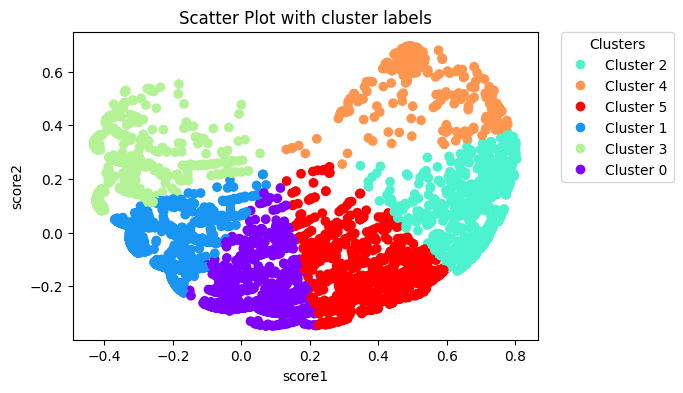

In [610]:
show_kmeans_results(kpca_df, n_clusters=6)

In [387]:
# show_kmeans_results(kpca_df, n_clusters=5)

## Get labels

In [613]:
data = kpca_df[["score1", "score2"]] #kpca_df[["score1", "score2"]] # scaled_data
model = KMeans(n_clusters=6, n_init=100, random_state=42)
model.fit(data)

KMeans(n_clusters=6, n_init=100, random_state=42)

In [614]:
labels = model.predict(data)
pd.DataFrame(labels).value_counts()

0
1    2060
0    1255
3    1079
5     871
2     548
4     286
Name: count, dtype: int64

In [ ]:
# label_df = label_df.drop("kmeans_kpca_gamma005_5", axis=1)

In [615]:
label_df["kmeans_kpca_gamma_005_6"] = labels
label_df

,hierarchical_ward_2,hierarchical_ward_3,hierarchical_ward_4,hierarchical_ward_5,hierarchical_ward_8,kmeans_kpca_gamma200_4,kmeans_kpca_gamma100_3,kmeans_kpca_gamma10_3,kmeans_kpca_gamma10_4,kmeans_kpca_gamma05_5,kmeans_kpca_gamma005_5,kmeans_pca_5,kmeans_kpca_gamma_005_6
0,0,1,0,3,0,0,0,0,0,1,1,2,2
1,0,2,2,2,3,0,0,0,0,1,3,4,4
2,0,2,2,2,7,0,0,0,0,1,3,4,4
3,0,2,2,2,3,0,0,0,0,1,3,4,4
4,0,2,2,2,3,0,0,0,0,1,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6094,0,1,0,3,0,0,0,0,0,1,1,1,5
6095,0,1,0,3,0,0,0,0,0,1,1,2,2
6096,0,2,2,2,3,0,0,0,0,1,3,2,4
6097,0,1,0,3,0,0,0,0,0,1,3,2,2


In [616]:
label_df.columns

Index(['hierarchical_ward_2', 'hierarchical_ward_3', 'hierarchical_ward_4',
       'hierarchical_ward_5', 'hierarchical_ward_8', 'kmeans_kpca_gamma200_4',
       'kmeans_kpca_gamma100_3', 'kmeans_kpca_gamma10_3',
       'kmeans_kpca_gamma10_4', 'kmeans_kpca_gamma05_5',
       'kmeans_kpca_gamma005_5', 'kmeans_pca_5', 'kmeans_kpca_gamma_005_6'],
      dtype='object')

In [431]:
train_data1 = train_data1.reset_index()
train_data1

,index,URL,roast_lv_adj,Agtron_whole,Agtron_ground,Aroma,Acidity_combined,Body,Flavor,Aftertaste
0,2,https://www.coffeereview.com/review/100-arabic...,2.0000,54.0000,69.0000,8.0000,7.0000,7.0000,8.0000,7.0000
1,5,https://www.coffeereview.com/review/100-arabica/,6.0000,0.0000,57.0000,6.0000,6.0000,8.0000,6.0000,6.0000
2,6,https://www.coffeereview.com/review/100-colomb...,6.0000,0.0000,46.0000,6.0000,6.0000,8.0000,7.0000,7.0000
3,10,https://www.coffeereview.com/review/100-colomb...,6.0000,0.0000,36.0000,6.0000,5.0000,6.0000,4.0000,4.0000
4,11,https://www.coffeereview.com/review/100-colomb...,6.0000,0.0000,40.0000,6.0000,6.0000,6.0000,6.0000,5.0000
...,...,...,...,...,...,...,...,...,...,...
6094,8381,https://www.coffeereview.com/review/zimbabwe-p...,2.0000,55.0000,78.0000,8.0000,8.0000,8.0000,8.0000,7.0000
6095,8382,https://www.coffeereview.com/review/zimbabwean...,3.0000,48.0000,67.0000,8.0000,7.0000,8.0000,8.0000,7.0000
6096,8383,https://www.coffeereview.com/review/zimbabwe/,3.0000,50.0000,63.0000,5.0000,6.0000,8.0000,6.0000,7.0000
6097,8384,https://www.coffeereview.com/review/zombie-des...,4.0000,47.0000,52.0000,8.0000,7.0000,8.0000,7.0000,7.0000


In [617]:
# Combine label_df with train_data1
label_columns = ['hierarchical_ward_2', 'hierarchical_ward_3', 'hierarchical_ward_4',
       'hierarchical_ward_5', 'hierarchical_ward_8', 'kmeans_kpca_gamma05_5',
       'kmeans_kpca_gamma005_5', 'kmeans_kpca_gamma_005_6', 'kmeans_pca_5']

result_df = pd.concat([train_data1, label_df[label_columns]], axis=1)
result_df

,index,URL,roast_lv_adj,Agtron_whole,Agtron_ground,Aroma,Acidity_combined,Body,Flavor,Aftertaste,hierarchical_ward_2,hierarchical_ward_3,hierarchical_ward_4,hierarchical_ward_5,hierarchical_ward_8,kmeans_kpca_gamma05_5,kmeans_kpca_gamma005_5,kmeans_kpca_gamma_005_6,kmeans_pca_5
0,2,https://www.coffeereview.com/review/100-arabic...,2.0000,54.0000,69.0000,8.0000,7.0000,7.0000,8.0000,7.0000,0,1,0,3,0,1,1,2,2
1,5,https://www.coffeereview.com/review/100-arabica/,6.0000,0.0000,57.0000,6.0000,6.0000,8.0000,6.0000,6.0000,0,2,2,2,3,1,3,4,4
2,6,https://www.coffeereview.com/review/100-colomb...,6.0000,0.0000,46.0000,6.0000,6.0000,8.0000,7.0000,7.0000,0,2,2,2,7,1,3,4,4
3,10,https://www.coffeereview.com/review/100-colomb...,6.0000,0.0000,36.0000,6.0000,5.0000,6.0000,4.0000,4.0000,0,2,2,2,3,1,3,4,4
4,11,https://www.coffeereview.com/review/100-colomb...,6.0000,0.0000,40.0000,6.0000,6.0000,6.0000,6.0000,5.0000,0,2,2,2,3,1,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6094,8381,https://www.coffeereview.com/review/zimbabwe-p...,2.0000,55.0000,78.0000,8.0000,8.0000,8.0000,8.0000,7.0000,0,1,0,3,0,1,1,5,1
6095,8382,https://www.coffeereview.com/review/zimbabwean...,3.0000,48.0000,67.0000,8.0000,7.0000,8.0000,8.0000,7.0000,0,1,0,3,0,1,1,2,2
6096,8383,https://www.coffeereview.com/review/zimbabwe/,3.0000,50.0000,63.0000,5.0000,6.0000,8.0000,6.0000,7.0000,0,2,2,2,3,1,3,4,2
6097,8384,https://www.coffeereview.com/review/zombie-des...,4.0000,47.0000,52.0000,8.0000,7.0000,8.0000,7.0000,7.0000,0,1,0,3,0,1,3,2,2


# Relate cluster labels to rating/price/origin

In [632]:
combined_features = ["URL", "Coffee Origin", "coffee_origin_adj", "With Milk", 
                     "Roaster Latitude", "Roaster Longitude", "review_date_adj", "Rating", "usd_per_100g_adj"]
analysis_df = pd.merge(result_df, df[combined_features], on="URL", how="left")
analysis_df

,index,URL,roast_lv_adj,Agtron_whole,Agtron_ground,Aroma,Acidity_combined,Body,Flavor,Aftertaste,...,kmeans_kpca_gamma_005_6,kmeans_pca_5,Coffee Origin,coffee_origin_adj,With Milk,Roaster Latitude,Roaster Longitude,review_date_adj,Rating,usd_per_100g_adj
0,2,https://www.coffeereview.com/review/100-arabic...,2.0000,54.0000,69.0000,8.0000,7.0000,7.0000,8.0000,7.0000,...,2,2,"Utuado, central Puerto Rico",peurto rico,NaN,18.4542,-66.0706,2017-05-01,87.0000,9.6151
1,5,https://www.coffeereview.com/review/100-arabica/,6.0000,0.0000,57.0000,6.0000,6.0000,8.0000,6.0000,6.0000,...,4,4,"Brazil, Central America, Colombia",colombia,NaN,36.3724,-94.2102,2008-01-01,82.0000,NaN
2,6,https://www.coffeereview.com/review/100-colomb...,6.0000,0.0000,46.0000,6.0000,6.0000,8.0000,7.0000,7.0000,...,4,4,Colombia,colombia,NaN,47.5653,-122.3305,2008-01-01,83.0000,NaN
3,10,https://www.coffeereview.com/review/100-colomb...,6.0000,0.0000,36.0000,6.0000,5.0000,6.0000,4.0000,4.0000,...,4,4,Colombia.,colombia,NaN,40.8474,-81.7624,2011-11-01,75.0000,3.4422
4,11,https://www.coffeereview.com/review/100-colomb...,6.0000,0.0000,40.0000,6.0000,6.0000,6.0000,6.0000,5.0000,...,4,4,Colombia,colombia,NaN,36.3575,-94.2146,2012-11-01,79.0000,1.4106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6094,8381,https://www.coffeereview.com/review/zimbabwe-p...,2.0000,55.0000,78.0000,8.0000,8.0000,8.0000,8.0000,7.0000,...,5,1,Eastern Zimbabwe,zimbabwe,NaN,34.9738,-82.4325,2007-06-01,90.0000,NaN
6095,8382,https://www.coffeereview.com/review/zimbabwean...,3.0000,48.0000,67.0000,8.0000,7.0000,8.0000,8.0000,7.0000,...,2,2,"Eastern Highlands, Zimbabwe",zimbabwe,NaN,34.9738,-82.4325,2007-06-01,88.0000,NaN
6096,8383,https://www.coffeereview.com/review/zimbabwe/,3.0000,50.0000,63.0000,5.0000,6.0000,8.0000,6.0000,7.0000,...,4,2,"Chipinge growing region, eastern Zimbabwe",zimbabwe,NaN,40.7759,-73.9795,2005-02-01,83.0000,NaN
6097,8384,https://www.coffeereview.com/review/zombie-des...,4.0000,47.0000,52.0000,8.0000,7.0000,8.0000,7.0000,7.0000,...,2,2,"Artibonite growing region, Haiti.",haiti,NaN,38.7807,-77.5588,2013-09-01,87.0000,5.9457


In [633]:
def get_frequency(df, which_variable, which_label):
    grouped_df = df.groupby(which_label)[which_variable].value_counts().unstack(fill_value=0)
    # Calculate the frequency rate for each country in each cluster
    frequency_df = grouped_df.div(grouped_df.sum(axis=1), axis=0)
    return frequency_df

In [634]:
# Function to capitalize each word for countries with spaces, or just the first letter if no space
def smart_capitalize(country):
    if pd.isnull(country):
        return None
    
    if ' ' in country:  # If there's a space, capitalize each word
        return ' '.join([word.capitalize() for word in country.split()])
    else:  # If there's no space, capitalize only the first letter
        return country.capitalize()

In [635]:
analysis_df['coffee_origin_adj'] = analysis_df['coffee_origin_adj'].apply(smart_capitalize)


In [636]:
country_to_continent = {
    'Puerto Rico': 'North America',
    'Colombia': 'South America',
    'Others': 'Others',
    'Ethiopia': 'Africa',
    'Guatemala': 'North America',
    'Hawaii': 'North America',
    'Jamaica': 'North America',
    'Mexico': 'North America',
    'Peru': 'South America',
    'Indonesia': 'Asia',
    'Tanzania': 'Africa',
    'Costa Rica': 'North America',
    'Kenya': 'Africa',
    'Brazil': 'South America',
    'Nicaragua': 'North America',
    'Panama': 'North America',
    'Thailand': 'Asia',
    'Bolivia': 'South America',
    'Philippines': 'Asia',
    'Taiwan': 'Asia',
    'Honduras': 'North America',
    'Congo': 'Africa',
    'Australia': 'Oceania',
    'Yemen': 'Asia',
    'China': 'Asia',
    'Salvador': 'Others',
    'Rwanda': 'Africa',
    'Burundi': 'Africa',
    'United States': 'North America',
    'Haiti': 'North America',
    'Ecuador': 'South America',
    'Dominican Republic': 'North America',
    'Vietnam': 'Asia',
    'India': 'Asia',
    'Uganda': 'Africa',
    'Zimbabwe': 'Africa',
    'Zambia': 'Africa'
}

analysis_df["continent"] = analysis_df["coffee_origin_adj"].map(country_to_continent)
analysis_df["Roast Level"] = analysis_df["roast_lv_adj"].map(label_level_map)

In [637]:
analysis_df.to_csv("../data/clustered_coffee.csv", index=False)

In [638]:
label_columns

['hierarchical_ward_2',
 'hierarchical_ward_3',
 'hierarchical_ward_4',
 'hierarchical_ward_5',
 'hierarchical_ward_8',
 'kmeans_kpca_gamma05_5',
 'kmeans_kpca_gamma005_5',
 'kmeans_kpca_gamma_005_6',
 'kmeans_pca_5']

## Cluster labels with Categorical variables

hierarchical_ward_2
1    4371
0    1516
Name: count, dtype: int64


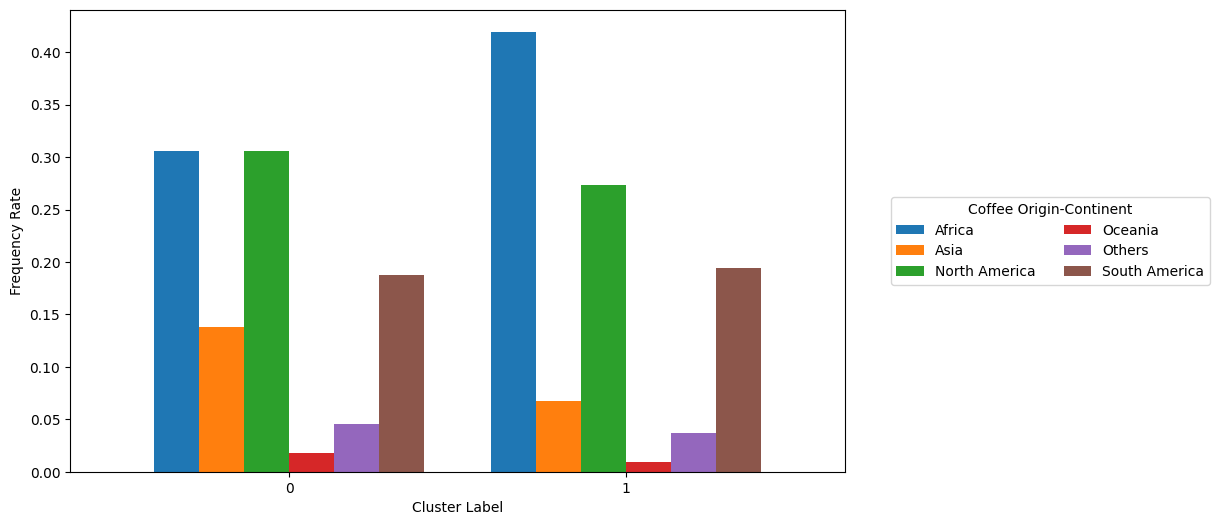

hierarchical_ward_3
0    4371
1    1393
2     123
Name: count, dtype: int64


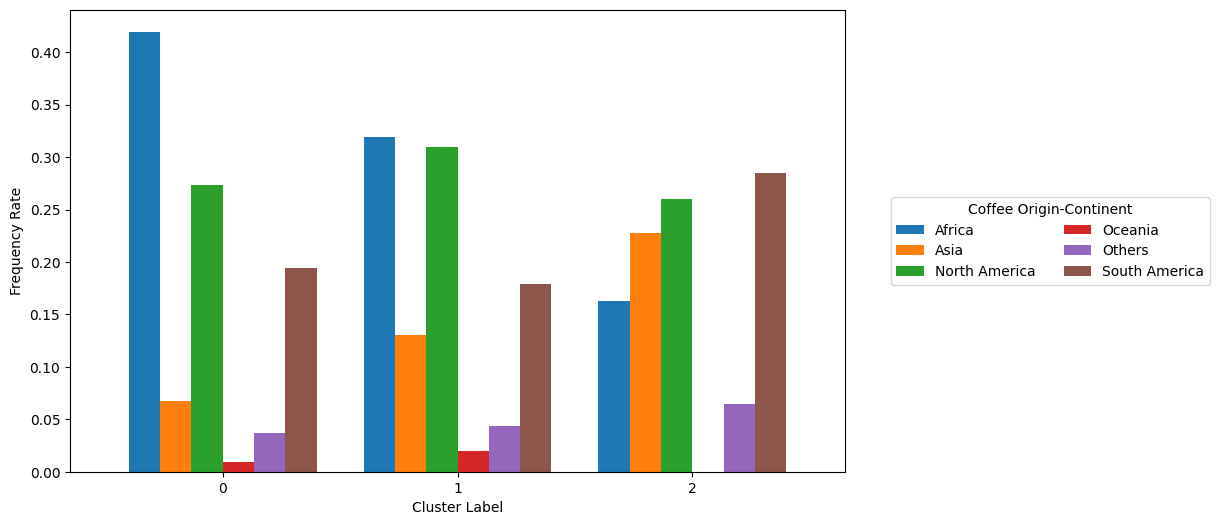

hierarchical_ward_4
1    2433
3    1938
0    1393
2     123
Name: count, dtype: int64


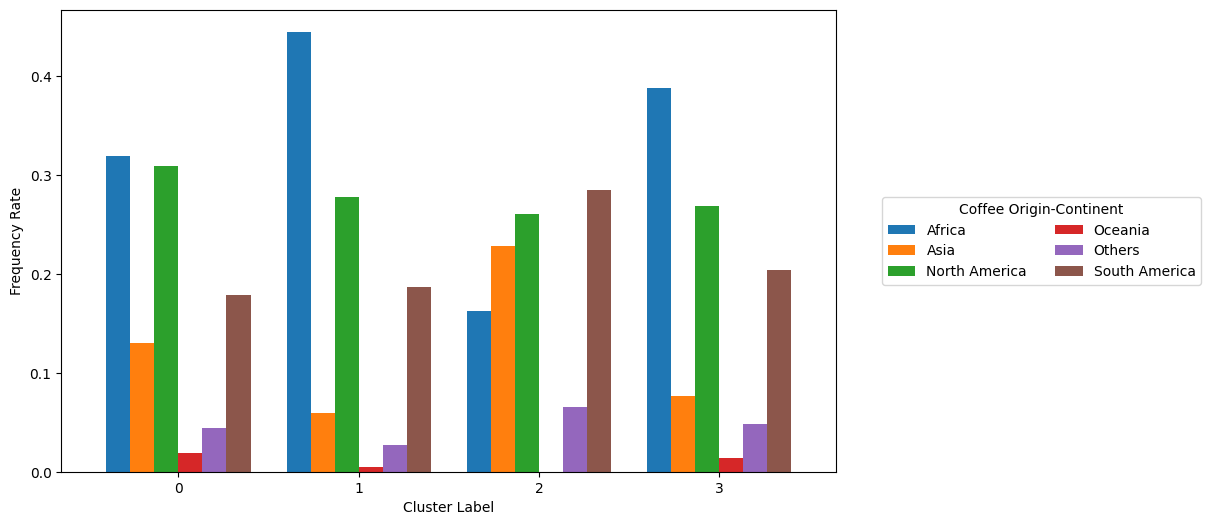

hierarchical_ward_5
0    2433
1    1938
4     719
3     674
2     123
Name: count, dtype: int64


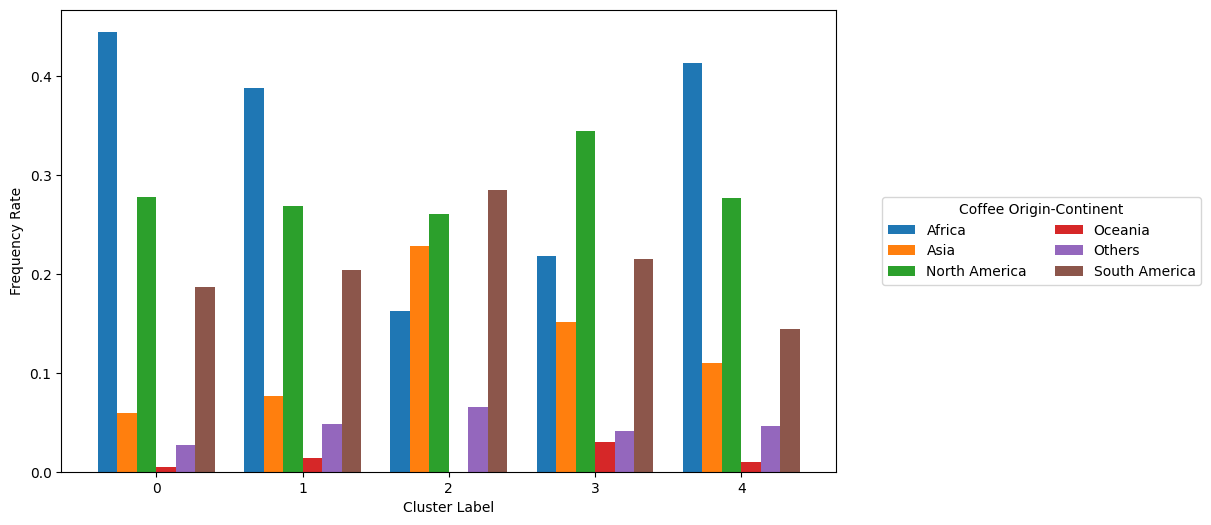

hierarchical_ward_8
5    1415
2    1146
1    1018
6     792
4     719
0     674
7      76
3      47
Name: count, dtype: int64


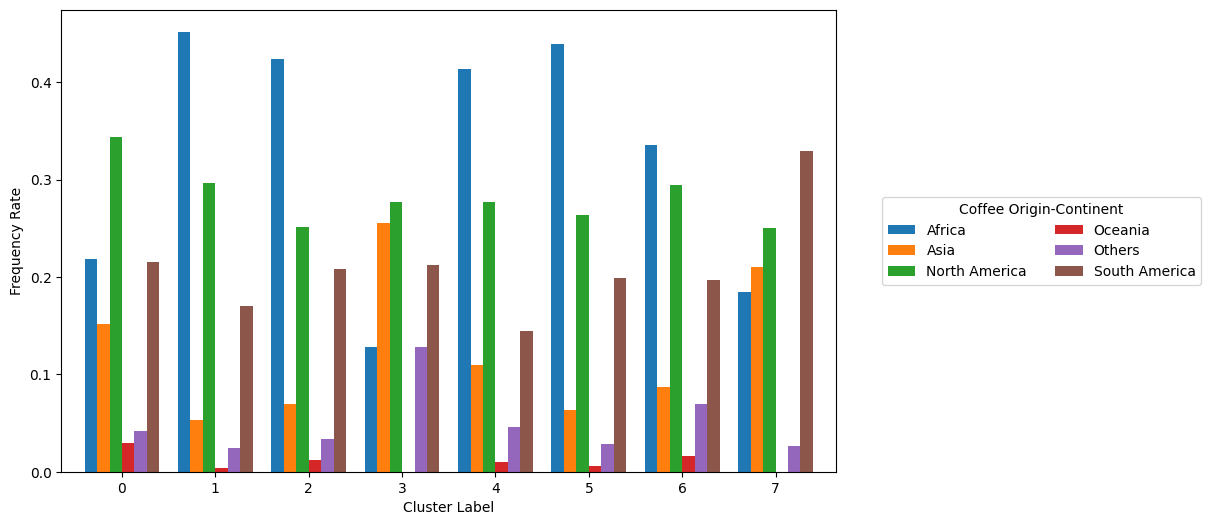

kmeans_kpca_gamma05_5
1    3716
2     667
0     565
4     513
3     426
Name: count, dtype: int64


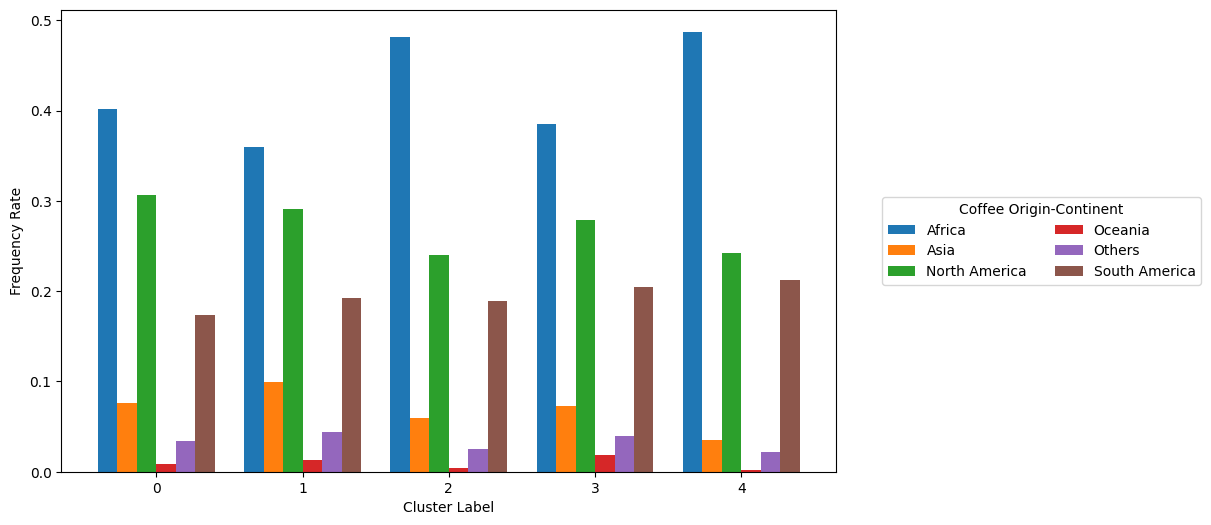

kmeans_kpca_gamma005_5
0    2075
4    1431
2    1078
1     866
3     437
Name: count, dtype: int64


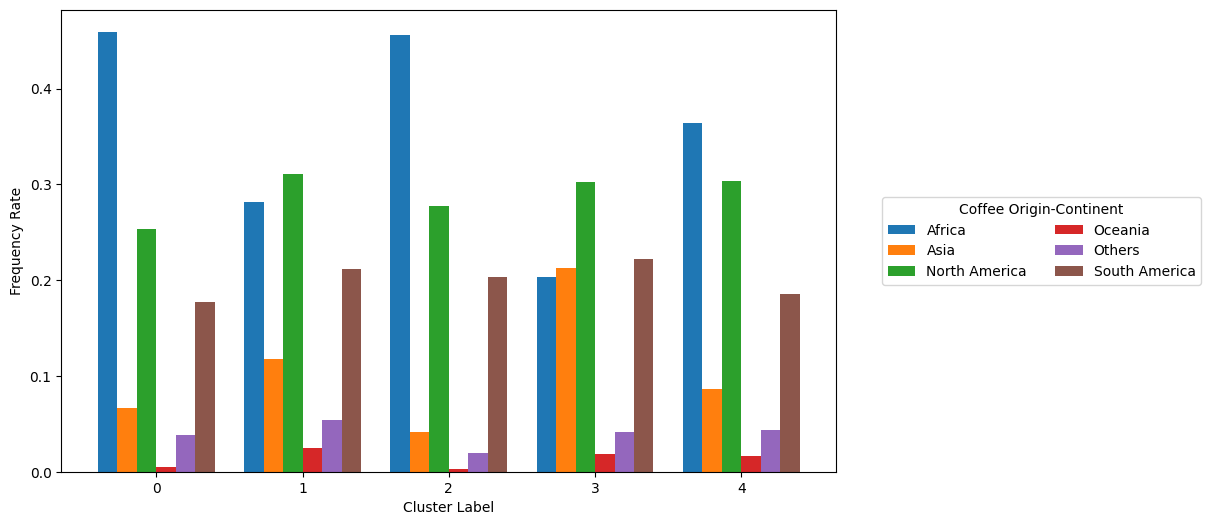

kmeans_kpca_gamma_005_6
1    2055
0    1238
3    1077
5     838
2     482
4     197
Name: count, dtype: int64


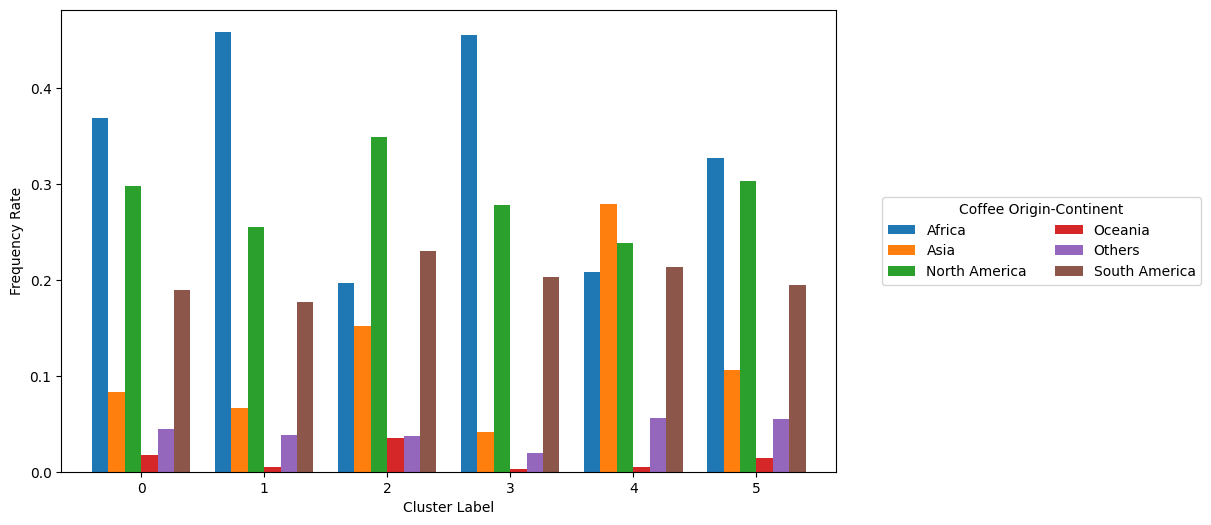

kmeans_pca_5
0    2894
1    1408
3     742
2     694
4     149
Name: count, dtype: int64


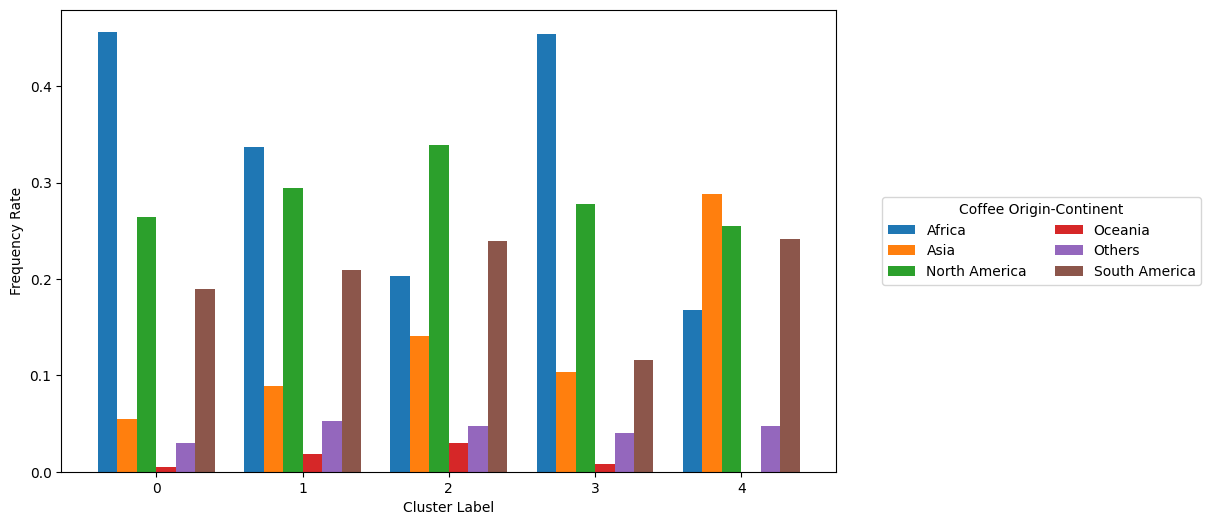

In [ ]:
which_variable = "continent"
for label in label_columns:
    which_label = label
    class_df = analysis_df[~analysis_df[which_variable].isnull()].copy()
    print(class_df[which_label].value_counts())

    frequency_df = get_frequency(class_df, which_variable=which_variable, which_label=which_label)
    # Plot the distribution of coffee_origin_adj within each cluster_label without stacking (dodged bar plot)
    frequency_df.plot(kind='bar', figsize=(10, 6), width=0.8)

    plt.title("")
    plt.xlabel('Cluster Label')
    plt.ylabel('Frequency Rate')
    plt.xticks(rotation=0)
    plt.legend(title='Coffee Origin-Continent', bbox_to_anchor=(1.05, 0.5), loc='center left', ncol=2)

    plt.show()

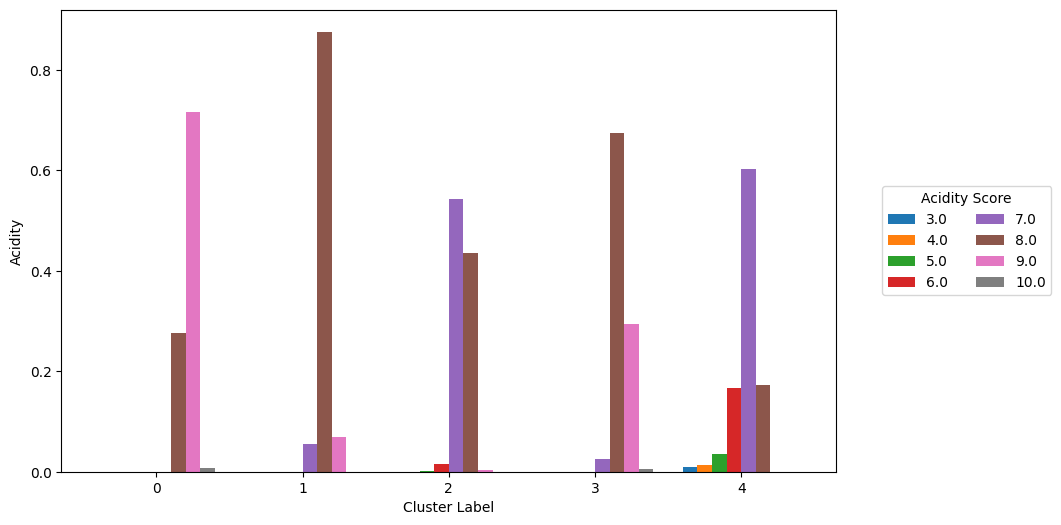

In [ ]:
# which_label = ""
# which_variable = ""
# class_df = analysis_df[~analysis_df[which_variable].isnull()].copy()
# print(class_df[which_label].value_counts())
# frequency_df = get_frequency(class_df, which_variable=which_variable, which_label=which_label)
# # Plot the distribution of coffee_origin_adj within each cluster_label without stacking (dodged bar plot)
# frequency_df.plot(kind='bar', figsize=(10, 6), width=0.8)

# """
# Cluster 2, 3, and 4 seem to have different 'Country gene'.
# Cluster 3 has different 'Country gene'.
# """

# plt.title("")
# plt.xlabel('Cluster Label')
# plt.ylabel('Acidity')
# plt.xticks(rotation=0)
# plt.legend(title='Acidity Score', bbox_to_anchor=(1.05, 0.5), loc='center left', ncol=2)

# plt.show()

In [642]:
# coffee_counts = class_df[which_variable].value_counts()

# # Plot the distribution of coffee origins
# plt.figure(figsize=(10, 6))
# coffee_counts.plot(kind='bar', color='skyblue')

# plt.title('Overall Distribution of Roast Levels')
# plt.xlabel('Roast Level')
# plt.ylabel('Coffee Count')
# plt.xticks(rotation=90)
# plt.show()

## Cluster labels with numeric variables
Using R

In [659]:
# Check dark coffee with origin (Rwandan?)
dark_df = analysis_df[analysis_df["roast_lv_adj"] == 6]
dark_df["coffee_origin_adj"].value_counts()

coffee_origin_adj
Colombia      29
Indonesia     20
Ethiopia       7
Costa Rica     7
Kenya          7
Guatemala      4
Mexico         4
Hawaii         3
Jamaica        3
Peru           2
Tanzania       2
Others         1
Salvador       1
India          1
Name: count, dtype: int64

In [660]:
analysis_df[analysis_df["coffee_origin_adj"] == "Indonesia"]["roast_lv_adj"].value_counts()

roast_lv_adj
2.0000    148
3.0000     81
4.0000     50
1.0000     27
6.0000     20
5.0000     15
Name: count, dtype: int64